

<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Mã sinh viên: 1821050295
* Họ và tên: Đỗ Thị Huyền
* Lớp/Nhóm môn học: DCCTPM63A / Nhóm 01
* Email: huyenjy@gmail.com
---

## CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - Phần 01
---


## B| THỰC HÀNH TRÊN LỚP:
---
Sử dụng dữ liệu đã được tiền xử lý trong tập Data_titanic_ok.csv của chương 2. Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách:
<img src='Pic/titanic.jpg'>

In [1]:
#Đọc tập dữ liệu đã xử lý trong chương 2
import pandas as pd

df_titanic = pd.read_csv('Data/Data_Titanic_ok.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [2]:
#Hiển thị 5 dòng dữ liệu của Dataset
df_titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [3]:
#Tách biến độc lập - biến phụ thuộc
#1.Tách biến độc lập X_titanic
X_titanic = df_titanic.iloc[:,1:].values
X_titanic

array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [4]:
#2.Tách biến độ lập y_titanic
y_titanic = df_titanic.iloc[:,0].values
y_titanic

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [5]:
#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split (X_titanic,
                                                                                    y_titanic,
                                                                                    test_size=0.25,
                                                                                    random_state=42)
print ('1. Kích thước tập Training: ', X_titanic_train.shape)
print ('2. Kích thước tập Testing: ', X_titanic_test.shape)

1. Kích thước tập Training:  (981, 6)
2. Kích thước tập Testing:  (328, 6)


In [6]:
#Xây dựng model và huấn luyện:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model với các tham số mặc định:
KNN_titanic = KNeighborsClassifier()

#Huấn luyện model với tập Train:

KNN_titanic.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Huấn luyện

acc_train = KNN_titanic.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train*100,2)))


Độ chính xác trên tập Train: 86.54 %


In [7]:
#Dự đoán trên tập test

y_titanic_pred = KNN_titanic.predict(X_titanic_test)

print ('Mô hình dự đoán: ',y_titanic_pred[:30])
print ('Giá trị thật   : ',y_titanic_test[:30])

Mô hình dự đoán:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Giá trị thật   :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [8]:
#Đánh giá độ chính xác:

acc_test = accuracy_score(y_titanic_test,y_titanic_pred)
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test*100,2)))

Độ chính xác trên tập Test: 85.98 %


In [9]:
#Đếm số mẫu dự đoán đúng

acc_test1 = accuracy_score(y_titanic_test,y_titanic_pred, normalize=False)
print ('Số mẫu dự đoán đúng trên tập Test: ',acc_test1, ' /', len(y_titanic_test))

Số mẫu dự đoán đúng trên tập Test:  282  / 328


## Thay đổi tham số của mô hình:
---
**Học Viên Thay đổi các tham số của model KNN-->Xác định bộ tham số có độ chính xác trên tập train - test cao nhất (ưu tiên tập Test)?**


### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


In [10]:
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=7,
                                    weights='distance',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))


Độ chính xác trên tập Train: 89.91 %
Độ chính xác trên tập Test: 82.93 %


In [11]:
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=9,
                                    weights='distance',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))

Độ chính xác trên tập Train: 89.91 %
Độ chính xác trên tập Test: 83.23 %


In [12]:
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=9,
                                    weights='uniform',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))

Độ chính xác trên tập Train: 86.75 %
Độ chính xác trên tập Test: 86.59 %


In [13]:
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=11,
                                    weights='distance',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))

Độ chính xác trên tập Train: 89.91 %
Độ chính xác trên tập Test: 82.93 %


In [14]:
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=11,
                                    weights='uniform',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))

Độ chính xác trên tập Train: 86.03 %
Độ chính xác trên tập Test: 85.67 %


In [10]:
#p=2, algorithm=brute, weights=uniform, n_neighbors=9
#Thay đổi các tham số của model: đánh giá độ chính xác
KNN_titanic1 = KNeighborsClassifier(n_neighbors=9,
                                    algorithm='brute',
                                    weights='uniform',
                                    p=2)
#Huấn luyện model với tập Train:

KNN_titanic1.fit(X_titanic_train, y_titanic_train)

#Độ chính xác của Model trên tập Train:

acc_train1 = KNN_titanic1.score(X_titanic_train,y_titanic_train)
print ('Độ chính xác trên tập Train: {} %'.format(round (acc_train1*100,2)))

#Độ chính xác của Model trên tập Test:

acc_test1 = accuracy_score(y_titanic_test, KNN_titanic1.predict(X_titanic_test))
print ('Độ chính xác trên tập Test: {} %'.format(round (acc_test1*100,2)))

Độ chính xác trên tập Train: 86.65 %
Độ chính xác trên tập Test: 87.2 %


Vậy với bộ tham số

1. n_neighbors=9,
2. weights='uniform',
3. p=2

thì Model có độ chính xác cao nhất.

1. Độ chính xác trên tập Train: 86.75 %

2. Độ chính xác trên tập Test: 86.59 %


# THỰC HÀNH 6: 
---
Sử dụng thuật toán KNN phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn (đã làm trong chương 2)
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán KNN để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
    - Sử dụng thuật toán KNN với các trường hợp: K= 5, 7, 11, 13 cho biết độ chính xác ứng với từng K đó trên tập Test.
    - Áp dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận. Cho biết độ chính xác của thuật toán trên tập Test và Ma trận confusion tương ứng.

## PHÂN LOẠI RƯỢU VỚI THUẬT TOÁN KNN
---
Dữ liệu là kết quả phân tích hóa học các loại rượu vang được trồng trong cùng một vùng ở Ý bởi ba người trồng trọt khác nhau. Có mười ba phép đo khác nhau được thực hiện cho các thành phần khác nhau được tìm thấy trong ba loại rượu.

Tập dữ liệu bao gồm 178  mẫu về các thông số nồng độ Alcohol, Axit malic,Tro, Độ kiềm của tro, Magiê, ... của 3 loại rượu được gán nhãn:
* 0 - class_0 (59 mẫu)
* 1 - class_1 (71 mẫu)
* 2 - class_2 (48 mẫu)

### 1. Đọc dữ liệu mẫu từ Sklearn
* X_wine: chứa các feature đầu vào (input)
* y_wine: chứa label đầu ra (target)

In [15]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY!}
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

data = load_wine()
df_wine = pd.DataFrame(data['data'], columns=data['feature_names'])
df_wine['label'] = data['target']
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [16]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
df_wine.iloc[48:60,:]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0


In [18]:
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [19]:
#Quan sát đặc trưng thống kê của tập dữ liệu
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [20]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

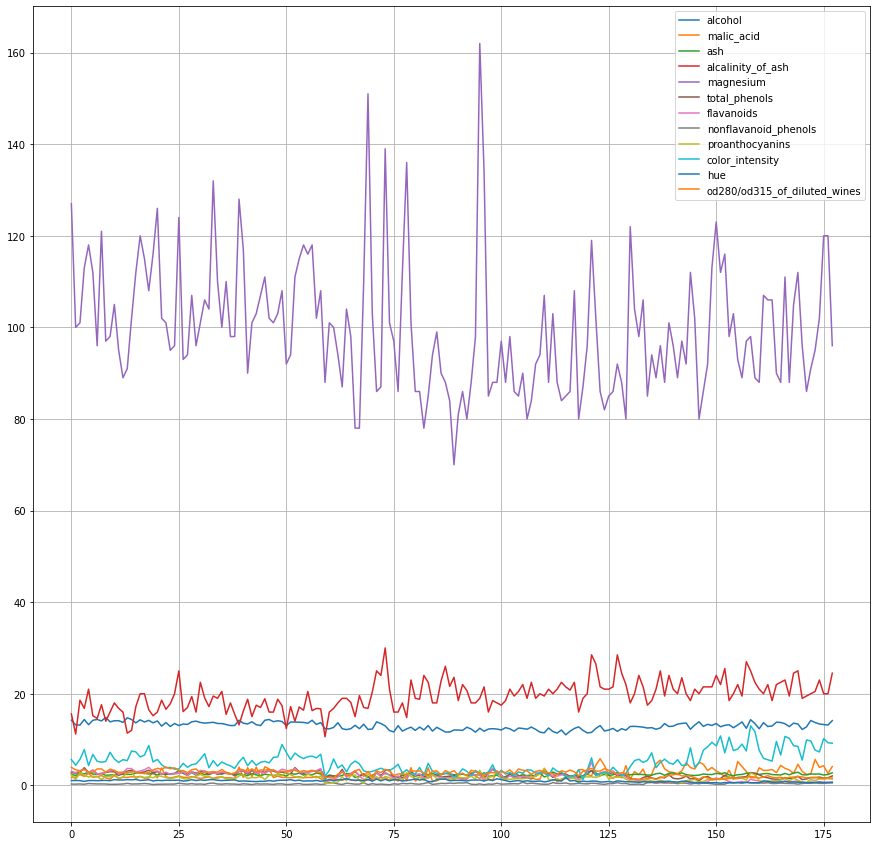

In [21]:
#View dữ liệu các thuộc tính độc lập

fig = plt.figure(figsize=(15,15))
plt.plot(df_wine.iloc[:,:12])
plt.legend(['alcohol','malic_acid','ash','alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'])
plt.grid(True)
plt.show()

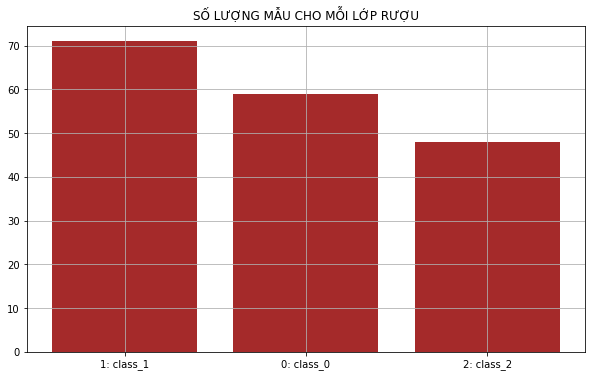

In [22]:
#Kiểm tra cân bằng dữ liệu
x = df_wine['label'].value_counts()

label=['1: class_1', '0: class_0', '2: class_2']

fig = plt.figure(figsize=(10,6))
plt.title('SỐ LƯỢNG MẪU CHO MỖI LỚP RƯỢU')
plt.bar(label,x, color='brown')
plt.grid(True)
plt.show()

#--->Tập dữ liệu cân bằng

In [23]:
#2. ĐỌC DỮ LIỆU MẪU VÀO BIẾN ARRAY X, y
#Đọc tập dữ liệu Iris Dataset
X_wine, y_wine = load_wine(return_X_y=True)

print(type(X_wine))
print('Kích thước biến độc lập X(features):', X_wine.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_wine.shape)

<class 'numpy.ndarray'>
Kích thước biến độc lập X(features): (178, 13)
Kích thước biến phụ thuộc y(target)   : (178,)


In [24]:
#Biến độc lập
X_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [25]:
#Biến phụ thuộc
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### 2. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (75%)
* Test: dùng để kiểm thử mô hình (25%)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, 
                                                    y_wine,
                                                    test_size=0.25,
                                                    random_state=42)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 133
2. Kích thước tập Test    : 45


## 3. Sử dụng thuật toán KNN với các trường hợp: K= 5, 7, 11, 13 cho biết độ chính xác ứng với từng K đó trên tập Test
---

In [27]:
#Khai báo model KNN sử dụng các tham số mặc định
KNN_wine = KNeighborsClassifier()

#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine.fit(X_train,y_train)

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine.predict(X_test)

#Sử dụng module accuracy_score trong thư viện sklearn để đánh giá độ chính xác:
#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test

acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp rượu (k=5 default): {} %'.format(round(acc1*100,2)))

Độ chính xác của mô hình phân lớp rượu (k=5 default): 71.11 %


In [28]:
# Thay đổi tham số n_neighbors:

KNN_wine1 = KNeighborsClassifier(n_neighbors=7)
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine1.fit(X_train,y_train)

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine1.predict(X_test)

#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp rượu (k=7): {} %'.format(round(acc1*100,2)))

Độ chính xác của mô hình phân lớp rượu (k=7): 73.33 %


In [29]:
KNN_wine1 = KNeighborsClassifier(n_neighbors=11)
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine1.fit(X_train,y_train)

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine1.predict(X_test)

#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp rượu (k=11): {} %'.format(round(acc1*100,2)))

Độ chính xác của mô hình phân lớp rượu (k=11): 71.11 %


In [30]:
KNN_wine1 = KNeighborsClassifier(n_neighbors=13)
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine1.fit(X_train,y_train)

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine1.predict(X_test)

#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp rượu (k=13): {} %'.format(round(acc1*100,2)))

Độ chính xác của mô hình phân lớp rượu (k=13): 71.11 %


## 4. Sử dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận
---

In [31]:
KNN_wine1 = KNeighborsClassifier(n_neighbors=9,
                                 weights='distance')
#Thực hiện huấn luyện với dữ liệu tập train
KNN_wine1.fit(X_train,y_train)

#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_wine1.predict(X_test)

#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp rượu (k=9): {} %'.format(round(acc1*100,2)))

Độ chính xác của mô hình phân lớp rượu (k=9): 77.78 %


## Sử dụng Confusion matrix kiểm tra độ chính xác của model
---

In [32]:
#Đếm số lượng theo từng lớp trong tập Test
from collections import Counter

print('Tổng số mẫu tập Test:', len(y_test))
print(Counter(y_test))

Tổng số mẫu tập Test: 45
Counter({1: 18, 0: 15, 2: 12})


In [33]:
#Đếm số mẫu dự đoán đúng
acc_wine = accuracy_score(y_test, y_pred,normalize=False)
print('Tổng số mẫu dự đoán đúng trên tập Test:', acc_wine, ' /', len(y_test))

Tổng số mẫu dự đoán đúng trên tập Test: 35  / 45


In [34]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix

cnf_matrix_wine = confusion_matrix(y_test,y_pred,)
print('Confusion matrix - Titanic:')
print(cnf_matrix_wine)

Confusion matrix - Titanic:
[[13  0  2]
 [ 0 13  5]
 [ 1  2  9]]


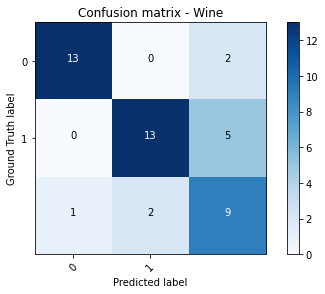

In [35]:
#Trực quan hóa ma trận Confusion matrix:

import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Ground Truth label')
    plt.xlabel('Predicted label')
    
class_names = [0,1]
plot_confusion_matrix(cnf_matrix_wine,
                      classes=class_names,
                      title='Confusion matrix - Wine')

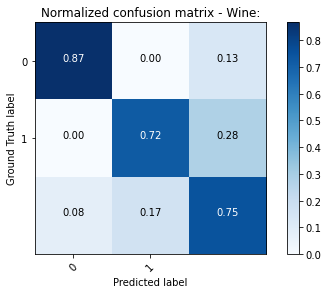

In [36]:
plot_confusion_matrix(cnf_matrix_wine, 
                      classes=class_names, 
                      normalize=True,
                      title='Normalized confusion matrix - Wine:')
plt.show()